In [1]:
from aeon.classification.interval_based import QUANTClassifier
from aeon.regression.interval_based import QUANTRegressor
from aeon.datasets import load_gunpoint
from aeon.datasets import load_from_ts_file
from aeon.datasets import load_basic_motions
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

import qgap

In [2]:
'''modelC = QUANTClassifier(estimator=RandomForestClassifier)
modelR = QUANTRegressor(estimator=RandomForestRegressor)
modelMC = QUANTClassifier(estimator=RandomForestClassifier)'''

'modelC = QUANTClassifier(estimator=RandomForestClassifier)\nmodelR = QUANTRegressor(estimator=RandomForestRegressor)\nmodelMC = QUANTClassifier(estimator=RandomForestClassifier)'

In [3]:
XtrainC, ytrainC = load_gunpoint(split="TRAIN")
#Xtest1, ytest1 = load_gunpoint(split="TEST")

XtrainMC, ytrainMC = load_basic_motions(split="TRAIN")

In [4]:
qfgapC = qgap.QGAP(matrix_type="dense")
qfgapR = qgap.QGAP(prediction_type="regression", matrix_type="dense")
qfgapMC = qgap.QGAP(matrix_type="dense")



In [5]:
qfgapC.fit(XtrainC,ytrainC)
Pc = qfgapC.get_proximities()
print(Pc.shape)

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)

In [ ]:
qfgapMC.fit(XtrainMC,ytrainMC)
Pmc = qfgapMC.get_proximities()
print(Pmc.shape)

(40, 40)


# Using Transformer to Add Static Labels

In [ ]:
from aeon.transformations.collection.interval_based import QUANTTransformer as QT
import matplotlib.pyplot as plt
import numpy as np
from helpers import *
import pandas as pd

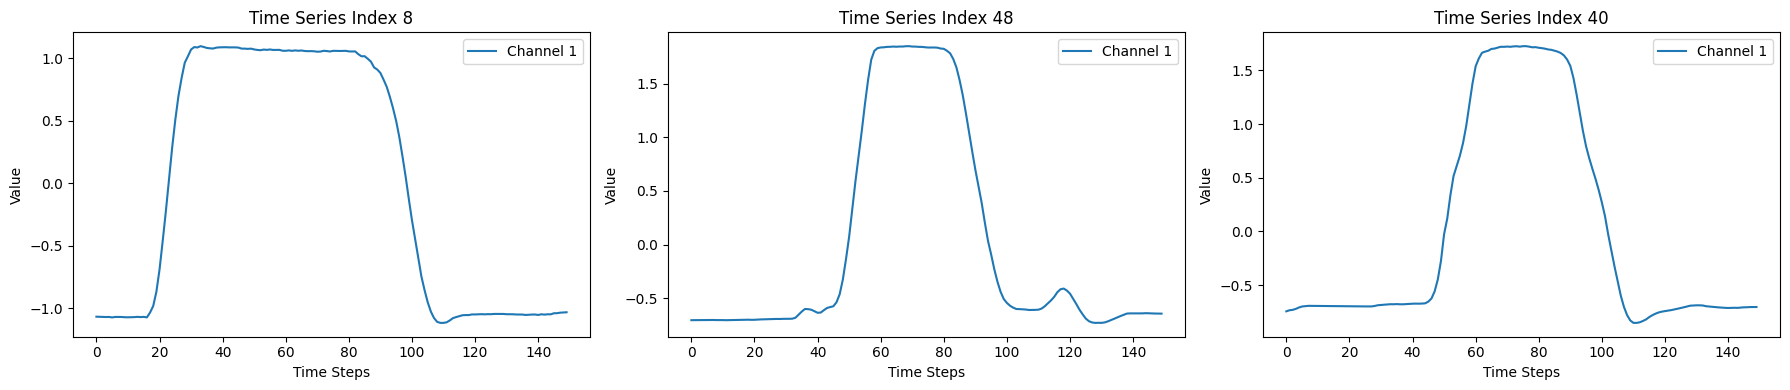

In [ ]:
plot_random_time_series(XtrainC, None, 3)

In [ ]:
# Fit and transform the time series
qt = QT()
qt.fit(XtrainC)
Xt = qt.transform(XtrainC)
print(Xt.shape), print(XtrainC.shape) # So we expanded our fifty time series into 1556 different features

(50, 1556)
(50, 1, 150)


(None, None)

In [ ]:
pd.DataFrame(Xt).sample(3)

,0,1,2,3,4,5,6,7,8,9,...,1546,1547,1548,1549,1550,1551,1552,1553,1554,1555
31,-1.488779,-1.485147,-1.483047,-1.482232,-1.481144,-1.480412,-1.389634,-1.374034,-1.370516,-1.364345,...,0.076204,0.068430,0.084444,0.041949,0.063174,0.064199,0.077563,0.027384,0.071422,0.083397
14,-0.870316,-0.809437,-0.758774,-0.692140,-0.641374,-0.625397,-0.620257,-0.613781,-0.612014,-0.607519,...,0.139392,0.130465,0.075808,0.106522,0.167883,0.117450,0.104565,0.114592,0.112618,0.144872
17,-0.950039,-0.925338,-0.859359,-0.747144,-0.670679,-0.644535,-0.643651,-0.641727,-0.640391,-0.638597,...,0.234049,0.266118,0.185045,0.179050,0.315874,0.221233,0.178911,0.191757,0.271668,0.141171


In [ ]:
# Create random static variables to append to the dataframe
Xstatic = np.random.rand(Xt.shape[0], 45)
X = np.hstack([Xt, Xstatic])
X.shape

NameError: name 'np' is not defined

In [ ]:
from sklearn.utils.class_weight import compute_sample_weight

# Compute sample weights for classification based on ytrainC
sample_weights = compute_sample_weight(class_weight='balanced', y=ytrainC)

# Create and train the Random Forest using the sample weights
rf_model = RandomForestClassifier()
rf_model.fit(X, ytrainC, sample_weight=sample_weights)

RandomForestClassifier()

In [ ]:
rf_model.feature_importances_.max()

np.float64(0.03660361169260658)

In [ ]:
rf_model.predict(X)

array(['2', '2', '1', '1', '2', '2', '2', '2', '2', '1', '1', '1', '1',
       '1', '2', '1', '2', '2', '1', '2', '1', '1', '1', '2', '1', '2',
       '1', '1', '2', '1', '1', '2', '2', '1', '2', '1', '2', '2', '2',
       '2', '2', '1', '1', '1', '2', '2', '1', '2', '1', '2'], dtype='<U1')

## Qgap tests with static variables

In [ ]:
qfgapC = qgap.QGAP(matrix_type="dense")

qfgapC.fit(XtrainC,ytrainC, static = Xstatic)
Pc = qfgapC.get_proximities()
print(Pc.shape)

NameError: name 'Xstatic' is not defined